#Домашнее задание № 13

#Алгоритмы кластеризации



In [1]:
# установим библиотеку
!pip install opencv-python

In [2]:
# вспомогательная функция для отображения картинок
import matplotlib.pyplot as plt
import cv2
import skimage
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

def draw_picture(image, title, bgr=True):
    if bgr:
        b, g, r = cv2.split(image)
        image = cv2.merge([r, g, b])

    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(image)
    plt.title(title)
    plt.show()

In [3]:
# не хочет монтироваться)
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# попробуем по другому
!wget 'https://u.netology.ru/backend/uploads/lms/content_assets/file/5502/Изображение_к_дз_по_Кластеризации_feml.jpg'

--2024-11-10 11:09:46--  https://u.netology.ru/backend/uploads/lms/content_assets/file/5502/%D0%98%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BA_%D0%B4%D0%B7_%D0%BF%D0%BE_%D0%9A%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8_feml.jpg
Resolving u.netology.ru (u.netology.ru)... 213.180.193.247, 2a02:6b8::1da
Connecting to u.netology.ru (u.netology.ru)|213.180.193.247|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 107959 (105K) [image/jpeg]
Saving to: ‘Изображение_к_дз_по_Кластеризации_feml.jpg.1’

Изображение_к_дз_по 100%[===================>] 105.43K   232KB/s    in 0.5s    

2024-11-10 11:09:47 (232 KB/s) - ‘Изображение_к_дз_по_Кластеризации_feml.jpg.1’ saved [107959/107959]



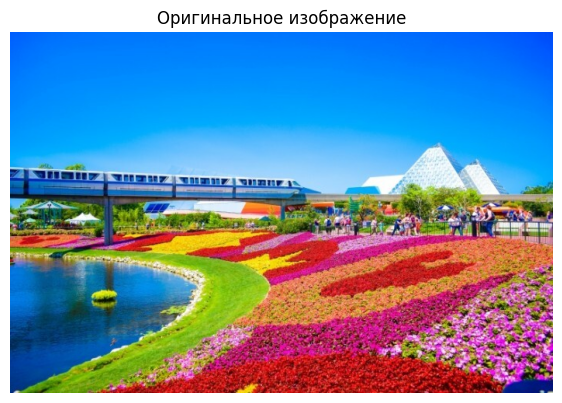

In [5]:
# посмотрим на нашу картинку
path = '/content/Изображение_к_дз_по_Кластеризации_feml.jpg'
img = cv2.imread(path)
draw_picture(img, 'Оригинальное изображение', bgr=True)

In [6]:
# посмотрим его размер
img.shape

(466, 700, 3)

#2. Реализуем 3 модели кластеризации

a) KMeans. Число кластеров K = 2, 5, 10, 20

In [7]:
# загрузим библиотеки
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [8]:
# сделаем наше изображение "плоским" для загрузки в модель
original_image = img
reshaped_img = np.reshape(original_image,
	                        ((original_image.shape[0] * original_image.shape[1]),
                          3)
                         )
reshaped_img

array([[255,  92,   0],
       [255,  92,   0],
       [253,  93,   0],
       ...,
       [189, 213, 203],
       [187, 212, 202],
       [182, 208, 195]], dtype=uint8)

K=2

In [9]:
# построим модель с 2 кластерами
km = KMeans(n_clusters=2)

In [10]:
# обучим модель
km.fit(reshaped_img)
km

KMeans(n_clusters=2)

In [11]:
# получим предсказания
target = km.fit_predict(reshaped_img)
target

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [12]:
set(target)

{0, 1}

In [13]:
len(target)

326200

In [14]:
# найдем расположение центроидов (центров кластеров)
color_space = km.cluster_centers_
color_space

array([[ 73.8954293 , 102.32324335, 163.59968814],
       [235.07468439, 145.39699916,  33.0613112 ]])

In [15]:
color_space[target]

array([[235.07468439, 145.39699916,  33.0613112 ],
       [235.07468439, 145.39699916,  33.0613112 ],
       [235.07468439, 145.39699916,  33.0613112 ],
       ...,
       [ 73.8954293 , 102.32324335, 163.59968814],
       [ 73.8954293 , 102.32324335, 163.59968814],
       [ 73.8954293 , 102.32324335, 163.59968814]])

In [16]:
# вернем обратно в беззнаковое целое число, чтобы визуализировать изображение
output_image = np.reshape(color_space.astype('uint8')[target],
                          (original_image.shape[0], original_image.shape[1], 3)
                         )

In [17]:
# проверим размер
output_image.shape

(466, 700, 3)

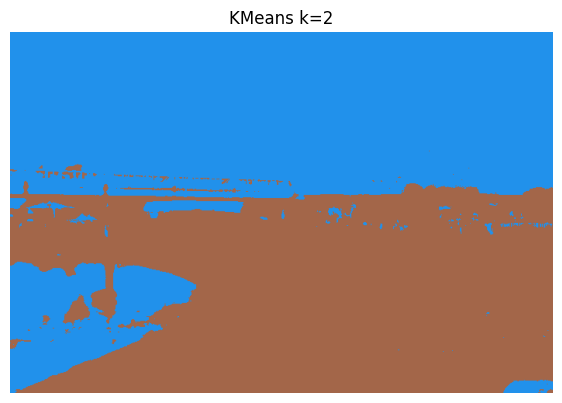

In [18]:
draw_picture(output_image, 'KMeans k=2', bgr=True)

k=5

In [19]:
# для дальнейших операций напишем маленькубю функцию
def KM_k(original_image=original_image, reshaped_img=reshaped_img, k=2):

  km_ = KMeans(n_clusters=k)
  target_ = km_.fit_predict(reshaped_img)
  color_space_ = km_.cluster_centers_
  output_image_ = np.reshape(color_space_.astype('uint8')[target_],
                             (original_image.shape[0], original_image.shape[1], 3)
                            )
  draw_picture(output_image_, 'KMeans k={}'.format(k), bgr=True)

  return

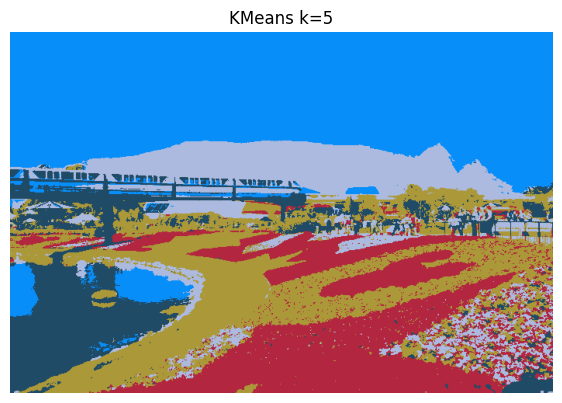

In [20]:
# посмотрим
KM_k(k=5)

k=10

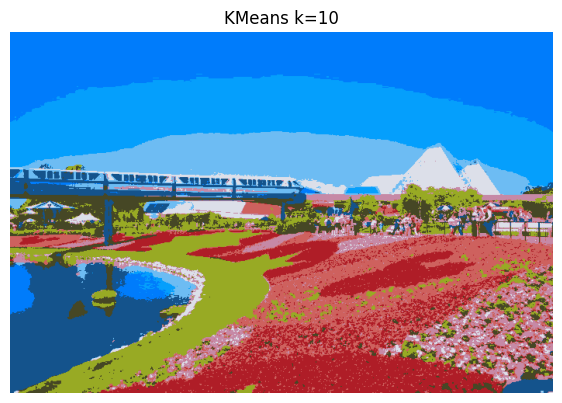

In [21]:
# посмотрим
KM_k(k=10)

k=20

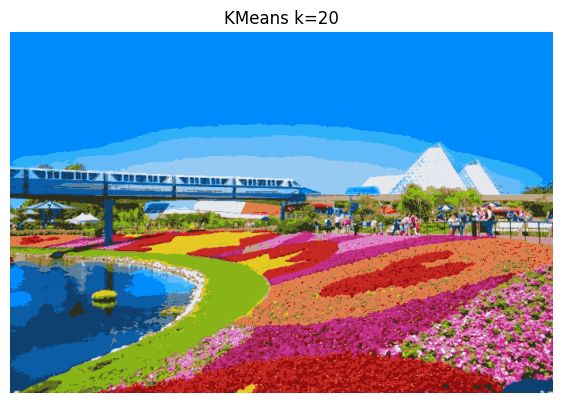

In [22]:
# посмотрим
KM_k(k=20)

b) DBSCAN

Для реализации модели придется сократить размер. Иначе оперативной памяти не хватит.

In [23]:
# зададим меньший размер
new_size = (img.shape[1]//2, img.shape[0]//2)
new_size

(350, 233)

In [24]:
# уменьшим размер
img = cv2.resize(img, dsize = new_size,
                  interpolation=cv2.INTER_CUBIC   # кубическая интерполяция
                 )

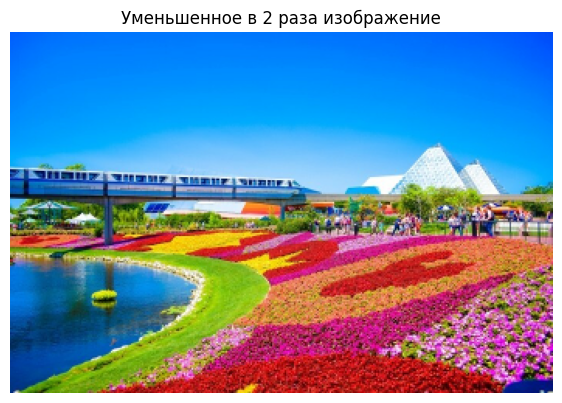

In [25]:
 # посмотрим на нашу картинку
draw_picture(img, 'Уменьшенное в 2 раза изображение', bgr=True)

In [26]:
# проверим размер
img.shape

(233, 350, 3)

In [27]:
# Создим объект DBSCAN
eps=9
min_samples=25
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

После многочисленных экспериментов это лучшее, что удалось подобрать.

In [ ]:
# обучим модель
dbscan.fit(reshaped_img)
dbscan

In [ ]:
# Получим предсказания
target = dbscan.fit_predict(reshaped_img)
target

In [ ]:
print('Итого найдено : {} кластеров'.format(len(set(target))), np.unique(target))

In [ ]:
# начнем строить наш df
# с ним уже привычнее)
import pandas as pd

# это df нашего "плоского" фото
df = pd.DataFrame(reshaped_img)
df.head()

In [ ]:
# добавим найденные кластеры
df['clusters'] = target
df.head()

In [ ]:
# усредним значения внутри кластеров
df_ = df.groupby(['clusters']).mean().astype('uint8')
# а это уже нужная информация для извлечения цвета кластера
df_.head()

In [ ]:
# запомним наши цвета для раскраски
color_space = np.stack((df_[0].to_numpy(),
                        df_[1].to_numpy(),
                        df_[2].to_numpy()),
                        axis=-1
                      )
color_space[:5]

In [ ]:
# вернем обратно в беззнаковое целое число, чтобы визуализировать изображение
output_image = np.reshape(color_space.astype('uint8')[target],
                            (img.shape[0], img.shape[1], 3)
                         )

In [ ]:
# посмотрим на нашу картинку
title = 'DBSCAN\n eps={}, min_samples={}'.format(eps, min_samples)
draw_picture(output_image, title, bgr=True)

In [ ]:
color_space_1 = []
for ele in np.unique(target):
    color_space_1.append(df[df['clusters'] == ele].iloc[0].tolist()[:3])

color_space_1 = np.asarray(color_space_1)
color_space_1[:5]

In [ ]:
# вернем обратно в беззнаковое целое число, чтобы визуализировать изображение
output_image = np.reshape(color_space_1.astype('uint8')[target],
                          (img.shape[0], img.shape[1], 3)
                         )

In [ ]:
# посмотрим на нашу картинку
title = 'DBSCAN\n eps={}, min_samples={}'.format(eps, min_samples)
draw_picture(output_image, title, bgr=True)

c) AgglomerativeClustering. Число кластеров K = 2, 5, 10, 20.

Практика показывает, что изображение необходимо еще больше сжать

In [ ]:
# зададим меньший размер
new_size = (img.shape[1]//2, img.shape[0]//2)
new_size

In [ ]:
# уменьшим размер
img = cv2.resize(img, dsize = new_size,
                  interpolation=cv2.INTER_CUBIC   # кубическая интерполяция
                 )

In [ ]:
 # посмотрим на нашу картинку
draw_picture(img, 'Уменьшенное в 4 раза изображение', bgr=True)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

k=2

In [ ]:
# сделаем наше изображение "плоским" для загрузки в модель
# original_image = img
#reshaped_img = np.reshape(original_image,
#	                        ((original_image.shape[0] * original_image.shape[1]),
#                          3)
#                         )
# reshaped_img

In [ ]:
# построим модель
# clustering = AgglomerativeClustering(n_clusters=2)

In [ ]:
# обучим модель
# clustering.fit(reshaped_img)
# clustering

In [ ]:
# получим кластеры
# labels = clustering.labels_
# labels

In [ ]:
# print('Итого найдено : {} кластеров'.format(len(set(labels))), np.unique(labels))